In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [239]:
def softmax(z):
    e_pa = np.exp(z)
    temp  = e_pa
    e_pa = e_pa/np.sum(temp,axis = 1,keepdims = True)
    return e_pa

class NeuralNetwork:
    def __init__(self,input_size ,layers,output_size):
        np.random.seed(0)
        model = {}
        
        model["W1"] = np.random.randn(input_size,layers[0])
        model["b1"] = np.zeros((1,layers[0]))
        
        model["W2"] = np.random.randn(layers[0],layers[1])
        model["b2"] = np.zeros((1,layers[1]))
        
        model["W3"] = np.random.randn(layers[1],output_size)
        model["b3"] = np.zeros((1,output_size))
        
        self.activations = None
        self.model = model
 
    def forward_prop(self,x):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        z1 = np.dot(x,W1)+b1
        a1 = np.tanh(z1)
        
        z2  = np.dot(a1,W2)+b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3)+b3
        y_ = softmax(z3)
        
        self.activations = (a1,a2,y_)
        
        return y_
    def backprop(self,x,y,learning_rate):
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
        
        a1,a2,y_ = self.activations
        m = x.shape[0]

        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)
        
        #updating the variables 
        self.model["W1"] -= learning_rate*dw1
        self.model["b1"] -= learning_rate*db1
        
        self.model["W2"] -= learning_rate*dw2
        self.model["b2"] -= learning_rate*db2
        
        self.model["W3"] -= learning_rate*dw3
        self.model["b3"] -= learning_rate*db3
    
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis = 1)
    
    def summary(self):
        
        W1,W2,W3 = self.model["W1"],self.model["W2"],self.model["W3"]
        b1,b2,b3 = self.model["b1"],self.model["b2"],self.model["b3"]
       
        a1,a2,y_ = self.activations

        print("W1 :",W1.shape)
        print("A1 :",a1.shape)
        
        print("W2 :",W2.shape)
        print("A2 :",a2.shape)
        
        print("W3 :",W3.shape)
        print("Y_out :",y_.shape)
        
        
    

In [208]:
def loss(y_out,p):
    l = -np.mean(y_out*np.log(p))
    return l

In [209]:
def onehot(y,depth):
    m  = y.shape[0]
    y_hot = np.zeros((m,depth))
    y_hot[np.arange(m),y]= 1
    
    return y_hot

In [123]:
make_circles?

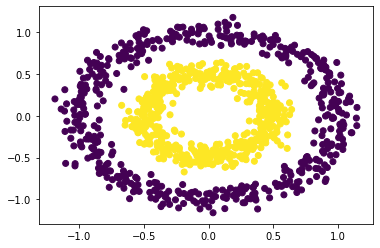

In [225]:
x,y = make_circles(n_samples = 1000,shuffle = True,noise =0.08,random_state = 9,factor =0.5 )
plt.scatter(x[:,0],x[:,1],c = y)

In [226]:
y = onehot(y,2)
print(y)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [227]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [228]:
print(x_train.shape)
print(x_test.shape)

(800, 2)
(200, 2)


In [240]:
model  = NeuralNetwork(2,[6,4],2)

In [241]:
def train(x,y,model,epochs,learning_rate,logs = True):
    train_loss = []
    for i in range(epochs):
        y_ = model.forward_prop(x)
        l = loss(y,y_)
        train_loss.append(l)
        model.backprop(x,y,learning_rate)
        if(logs):
            print("epochs : %d loss : %.4f"%(i,l))

    return train_loss      

In [242]:
loss1 = train(x_train,y_train,model,epochs =2000,learning_rate=0.001)

epochs : 0 loss : 0.4683
epochs : 1 loss : 0.5941
epochs : 2 loss : 0.4635
epochs : 3 loss : 0.4303
epochs : 4 loss : 0.4226
epochs : 5 loss : 0.3500
epochs : 6 loss : 0.3563
epochs : 7 loss : 0.3310
epochs : 8 loss : 0.3351
epochs : 9 loss : 0.3407
epochs : 10 loss : 0.3823
epochs : 11 loss : 0.3069
epochs : 12 loss : 0.3140
epochs : 13 loss : 0.2886
epochs : 14 loss : 0.2932
epochs : 15 loss : 0.2709
epochs : 16 loss : 0.2713
epochs : 17 loss : 0.2556
epochs : 18 loss : 0.2529
epochs : 19 loss : 0.2407
epochs : 20 loss : 0.2354
epochs : 21 loss : 0.2256
epochs : 22 loss : 0.2184
epochs : 23 loss : 0.2107
epochs : 24 loss : 0.2022
epochs : 25 loss : 0.1962
epochs : 26 loss : 0.1872
epochs : 27 loss : 0.1825
epochs : 28 loss : 0.1736
epochs : 29 loss : 0.1699
epochs : 30 loss : 0.1612
epochs : 31 loss : 0.1580
epochs : 32 loss : 0.1497
epochs : 33 loss : 0.1466
epochs : 34 loss : 0.1387
epochs : 35 loss : 0.1352
epochs : 36 loss : 0.1276
epochs : 37 loss : 0.1232
epochs : 38 loss : 0.1

epochs : 403 loss : 0.0034
epochs : 404 loss : 0.0034
epochs : 405 loss : 0.0034
epochs : 406 loss : 0.0034
epochs : 407 loss : 0.0034
epochs : 408 loss : 0.0034
epochs : 409 loss : 0.0034
epochs : 410 loss : 0.0034
epochs : 411 loss : 0.0034
epochs : 412 loss : 0.0034
epochs : 413 loss : 0.0033
epochs : 414 loss : 0.0033
epochs : 415 loss : 0.0033
epochs : 416 loss : 0.0033
epochs : 417 loss : 0.0033
epochs : 418 loss : 0.0033
epochs : 419 loss : 0.0033
epochs : 420 loss : 0.0033
epochs : 421 loss : 0.0033
epochs : 422 loss : 0.0033
epochs : 423 loss : 0.0033
epochs : 424 loss : 0.0032
epochs : 425 loss : 0.0032
epochs : 426 loss : 0.0032
epochs : 427 loss : 0.0032
epochs : 428 loss : 0.0032
epochs : 429 loss : 0.0032
epochs : 430 loss : 0.0032
epochs : 431 loss : 0.0032
epochs : 432 loss : 0.0032
epochs : 433 loss : 0.0032
epochs : 434 loss : 0.0032
epochs : 435 loss : 0.0031
epochs : 436 loss : 0.0031
epochs : 437 loss : 0.0031
epochs : 438 loss : 0.0031
epochs : 439 loss : 0.0031
e

epochs : 737 loss : 0.0017
epochs : 738 loss : 0.0017
epochs : 739 loss : 0.0017
epochs : 740 loss : 0.0017
epochs : 741 loss : 0.0017
epochs : 742 loss : 0.0017
epochs : 743 loss : 0.0017
epochs : 744 loss : 0.0017
epochs : 745 loss : 0.0017
epochs : 746 loss : 0.0017
epochs : 747 loss : 0.0017
epochs : 748 loss : 0.0017
epochs : 749 loss : 0.0017
epochs : 750 loss : 0.0017
epochs : 751 loss : 0.0017
epochs : 752 loss : 0.0016
epochs : 753 loss : 0.0016
epochs : 754 loss : 0.0016
epochs : 755 loss : 0.0016
epochs : 756 loss : 0.0016
epochs : 757 loss : 0.0016
epochs : 758 loss : 0.0016
epochs : 759 loss : 0.0016
epochs : 760 loss : 0.0016
epochs : 761 loss : 0.0016
epochs : 762 loss : 0.0016
epochs : 763 loss : 0.0016
epochs : 764 loss : 0.0016
epochs : 765 loss : 0.0016
epochs : 766 loss : 0.0016
epochs : 767 loss : 0.0016
epochs : 768 loss : 0.0016
epochs : 769 loss : 0.0016
epochs : 770 loss : 0.0016
epochs : 771 loss : 0.0016
epochs : 772 loss : 0.0016
epochs : 773 loss : 0.0016
e

epochs : 1087 loss : 0.0011
epochs : 1088 loss : 0.0011
epochs : 1089 loss : 0.0011
epochs : 1090 loss : 0.0011
epochs : 1091 loss : 0.0011
epochs : 1092 loss : 0.0011
epochs : 1093 loss : 0.0011
epochs : 1094 loss : 0.0011
epochs : 1095 loss : 0.0011
epochs : 1096 loss : 0.0011
epochs : 1097 loss : 0.0011
epochs : 1098 loss : 0.0011
epochs : 1099 loss : 0.0011
epochs : 1100 loss : 0.0011
epochs : 1101 loss : 0.0011
epochs : 1102 loss : 0.0011
epochs : 1103 loss : 0.0011
epochs : 1104 loss : 0.0011
epochs : 1105 loss : 0.0011
epochs : 1106 loss : 0.0011
epochs : 1107 loss : 0.0011
epochs : 1108 loss : 0.0011
epochs : 1109 loss : 0.0011
epochs : 1110 loss : 0.0011
epochs : 1111 loss : 0.0011
epochs : 1112 loss : 0.0011
epochs : 1113 loss : 0.0011
epochs : 1114 loss : 0.0011
epochs : 1115 loss : 0.0011
epochs : 1116 loss : 0.0011
epochs : 1117 loss : 0.0010
epochs : 1118 loss : 0.0010
epochs : 1119 loss : 0.0010
epochs : 1120 loss : 0.0010
epochs : 1121 loss : 0.0010
epochs : 1122 loss :

epochs : 1428 loss : 0.0008
epochs : 1429 loss : 0.0008
epochs : 1430 loss : 0.0008
epochs : 1431 loss : 0.0008
epochs : 1432 loss : 0.0008
epochs : 1433 loss : 0.0008
epochs : 1434 loss : 0.0008
epochs : 1435 loss : 0.0008
epochs : 1436 loss : 0.0008
epochs : 1437 loss : 0.0008
epochs : 1438 loss : 0.0008
epochs : 1439 loss : 0.0008
epochs : 1440 loss : 0.0008
epochs : 1441 loss : 0.0008
epochs : 1442 loss : 0.0008
epochs : 1443 loss : 0.0008
epochs : 1444 loss : 0.0008
epochs : 1445 loss : 0.0008
epochs : 1446 loss : 0.0008
epochs : 1447 loss : 0.0008
epochs : 1448 loss : 0.0008
epochs : 1449 loss : 0.0008
epochs : 1450 loss : 0.0008
epochs : 1451 loss : 0.0008
epochs : 1452 loss : 0.0008
epochs : 1453 loss : 0.0008
epochs : 1454 loss : 0.0008
epochs : 1455 loss : 0.0008
epochs : 1456 loss : 0.0008
epochs : 1457 loss : 0.0008
epochs : 1458 loss : 0.0008
epochs : 1459 loss : 0.0008
epochs : 1460 loss : 0.0008
epochs : 1461 loss : 0.0008
epochs : 1462 loss : 0.0008
epochs : 1463 loss :

epochs : 1754 loss : 0.0006
epochs : 1755 loss : 0.0006
epochs : 1756 loss : 0.0006
epochs : 1757 loss : 0.0006
epochs : 1758 loss : 0.0006
epochs : 1759 loss : 0.0006
epochs : 1760 loss : 0.0006
epochs : 1761 loss : 0.0006
epochs : 1762 loss : 0.0006
epochs : 1763 loss : 0.0006
epochs : 1764 loss : 0.0006
epochs : 1765 loss : 0.0006
epochs : 1766 loss : 0.0006
epochs : 1767 loss : 0.0006
epochs : 1768 loss : 0.0006
epochs : 1769 loss : 0.0006
epochs : 1770 loss : 0.0006
epochs : 1771 loss : 0.0006
epochs : 1772 loss : 0.0006
epochs : 1773 loss : 0.0006
epochs : 1774 loss : 0.0006
epochs : 1775 loss : 0.0006
epochs : 1776 loss : 0.0006
epochs : 1777 loss : 0.0006
epochs : 1778 loss : 0.0006
epochs : 1779 loss : 0.0006
epochs : 1780 loss : 0.0006
epochs : 1781 loss : 0.0006
epochs : 1782 loss : 0.0006
epochs : 1783 loss : 0.0006
epochs : 1784 loss : 0.0006
epochs : 1785 loss : 0.0006
epochs : 1786 loss : 0.0006
epochs : 1787 loss : 0.0006
epochs : 1788 loss : 0.0006
epochs : 1789 loss :

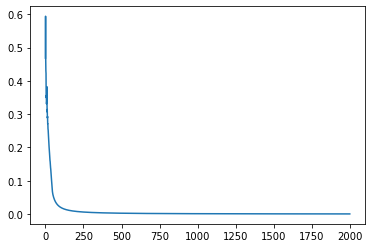

In [243]:
plt.plot(loss1)